#Package loading

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import neattext.functions as nfx #TextCleaning

#Dataset loading

In [ ]:
df = pd.read_csv("tweet_emotions_1 (1).csv") 

In [ ]:
df.head()

,tweet_id,emotions,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [ ]:
df.shape

(40000, 3)

In [ ]:
df.dtypes

tweet_id     int64
emotions    object
content     object
dtype: object

In [ ]:
df.isnull().sum() #Missing number check

tweet_id    0
emotions    0
content     0
dtype: int64

In [ ]:
df['emotions'].value_counts() #Value Count of emotions

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: emotions, dtype: int64

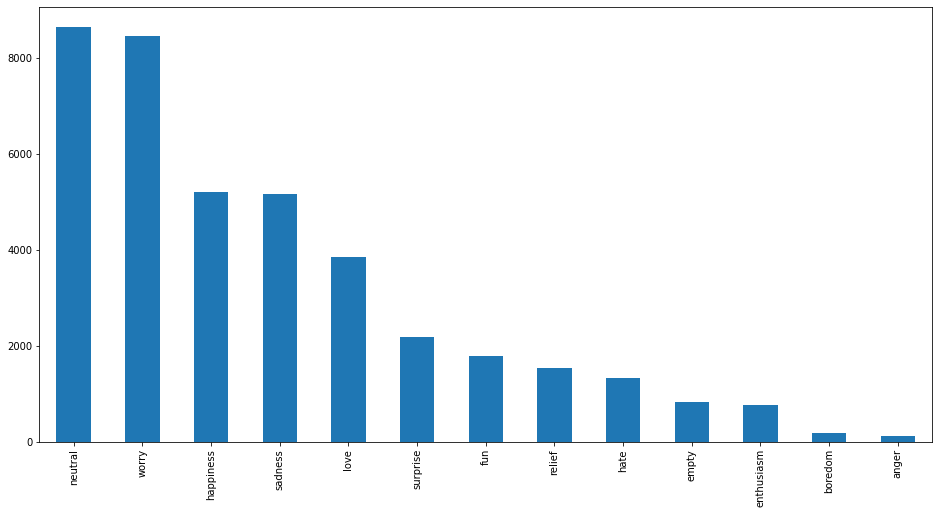

In [ ]:
plt.figure(figsize=(16,8))
df['emotions'].value_counts().plot(kind='bar')

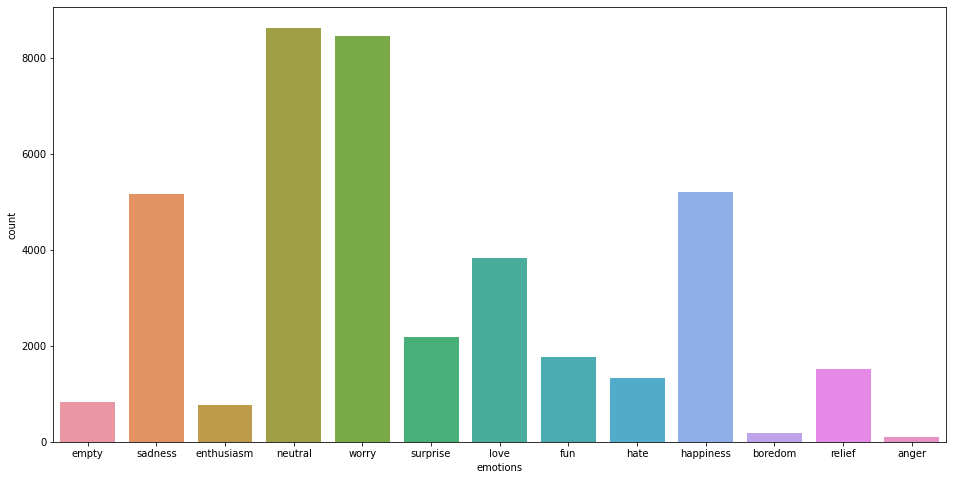

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x='emotions',data=df)

In [ ]:
from textblob import TextBlob #Sentiment Analysis

def get_sentiment(text):
    def get_subjectivity(text):
        return TextBlob(text).sentiment.subjectivity
  
    def get_polarity(text):
        return TextBlob(text).sentiment.polarity
  
    text_blob = TextBlob(text)
    subjectivity = get_subjectivity(text)
    polarity = get_polarity(text)
    
    analysis = 'Neutral'
    if polarity < 0:
        analysis = 'Negative'
    elif polarity > 0:
        analysis = 'Positive'
    
    return analysis


In [ ]:
result = get_sentiment('I hope to pass this course')
print(result)

Neutral


In [ ]:
df['sentiments'] = df['content'].apply(get_sentiment)

In [ ]:
df.head()

,tweet_id,emotions,content,sentiments
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,Negative
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Neutral
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,Neutral


In [ ]:
df.groupby([df['emotions'].apply(lambda x: str(x)), df['sentiments'].apply(lambda x: str(x))]).size()

emotions    sentiments
anger       Negative        34
            Neutral         41
            Positive        35
boredom     Negative        80
            Neutral         56
            Positive        43
empty       Negative       168
            Neutral        418
            Positive       241
enthusiasm  Negative       100
            Neutral        254
            Positive       405
fun         Negative       205
            Neutral        474
            Positive      1097
happiness   Negative       345
            Neutral       1224
            Positive      3640
hate        Negative       694
            Neutral        364
            Positive       265
love        Negative       214
            Neutral        684
            Positive      2944
neutral     Negative      1156
            Neutral       4442
            Positive      3040
relief      Negative       207
            Neutral        477
            Positive       842
sadness     Negative      1886
            Neut

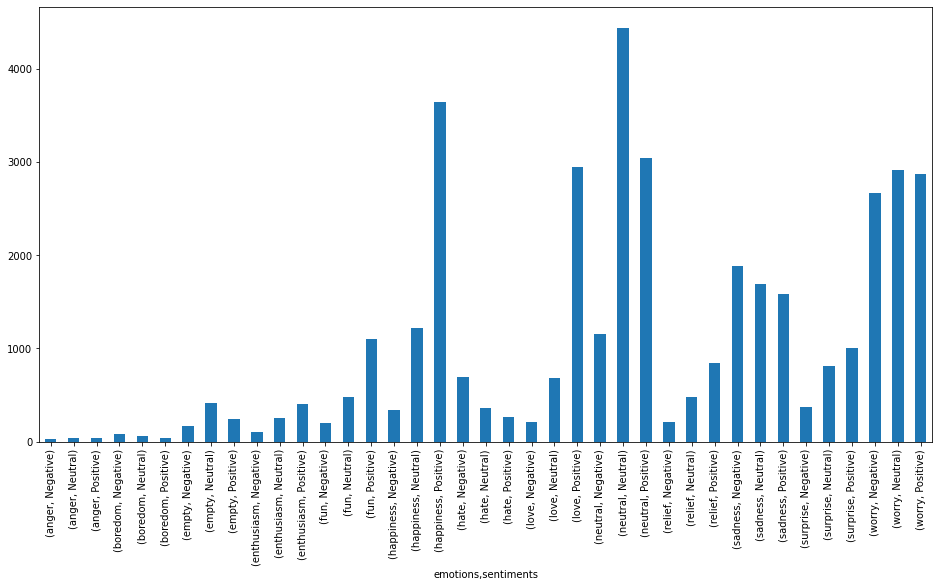

In [ ]:
plt.figure(figsize=(16,8)) #Comparison of emotions and sentiments
df.groupby(['emotions', 'sentiments']).size().plot(kind='bar')

Seaborn to plot 

In [ ]:
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7f6be42e6790>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


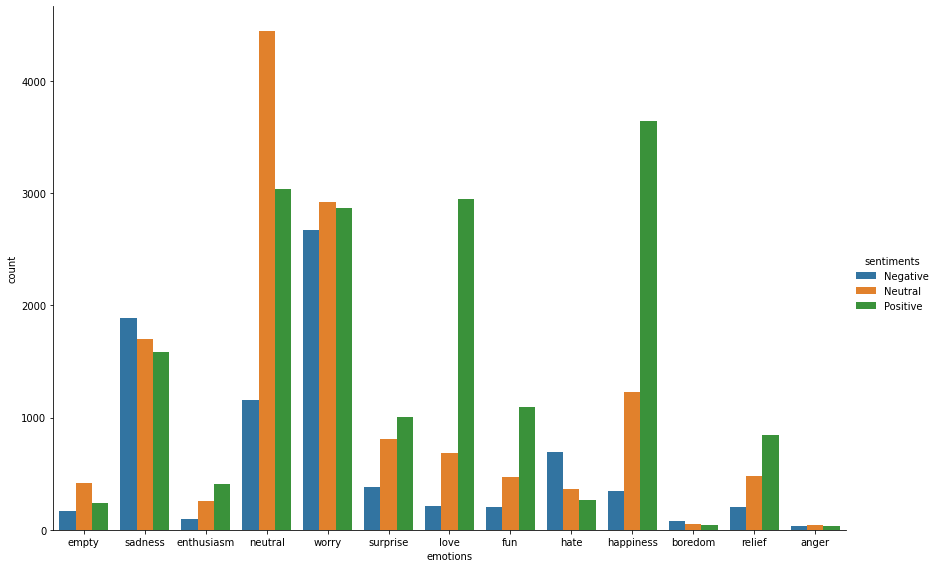

In [ ]:
sns.factorplot(x='emotions', hue='sentiments', data=df, kind='count', size=8, aspect=1.5) #Check per categories

Text Cleaning

In [ ]:
df['clean_content'] = df['content'].apply(nfx.remove_stopwords)

In [ ]:
#df['clean_content'] = df['clean_content'].apply(nfx.remove_stopwords)

In [ ]:
df['clean_content'] = df['clean_content'].apply(nfx.remove_userhandles)

In [ ]:
df['clean_content'] = df['clean_content'].apply(nfx.remove_punctuations)

In [ ]:
df[['content','clean_content']]

,content,clean_content
0,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started frea...
1,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhhwaitin call
2,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,wants hang friends SOON
4,@dannycastillo We want to trade with someone w...,want trade Houston tickets will
...,...,...
39995,@JohnLloydTaylor,
39996,Happy Mothers Day All my love,Happy Mothers Day love
39997,Happy Mother's Day to all the mommies out ther...,Happy Mothers Day mommies there woman man long...
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...


# Pre-processing: keywords extraction

In [ ]:
from collections import Counter

In [ ]:
def extract_keyword(text, num=50):
  tokens = [tok for tok in text.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [ ]:
emotion_list = df['emotions'].unique().tolist() #emotion list

In [ ]:
emotion_list

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

In [ ]:
anger_list = df[df['emotions'] == 'anger']['content'].tolist() #anger document extract

In [ ]:
anger_docx = ' '.join(anger_list)

In [ ]:
anger_docx

"fuckin'm transtelecom Working   But it's Fridaaaayyyyy Packing  I don't like it.. I tried to dye my hair and all i got was a blond chunk in the front middle part of my hair. Dang. &quot;locked up abroad&quot; makes bein half brown good risk mgmt when travelin 3rd world. i blend. i feel sorry for my hostage magnet white pepo @LouGagliardi  damned hordies @bcollinstattoo yes, boo for soar throats and earaches! My stomach is all EXPLODE from the wendys  why is everything that tastes good bad for you? @rmilana Hey, Wahts happening in #coffeclub..? I didnt have coffee for two days now  @dharshana Did a historical Jesus ever exist? Im finding it hard to prove, its all hearsay accounts ... it bugs me ... lost all my files since high school. i hav a chance to win $10, $100, $1000.  i was given a free can of $ plant..have to wait till the plant grow to know if i won anythin!!?! i never knew a dentention was so hard 2 get @drakesizzle  If you don't want to come then don't come. JEEEEEZ. @_super

In [ ]:
keyword_anger = extract_keywords(anger_docx)

In [ ]:
keyword_anger

{'I': 39,
 'to': 35,
 'my': 32,
 'a': 31,
 'the': 26,
 'me': 24,
 'is': 21,
 'i': 20,
 'it': 20,
 'and': 17,
 'of': 17,
 'for': 15,
 'in': 13,
 'all': 12,
 'you': 12,
 'at': 11,
 'was': 10,
 'that': 10,
 'so': 10,
 'on': 10,
 'with': 9,
 'are': 9,
 'get': 8,
 'not': 8,
 'when': 7,
 'have': 7,
 'your': 7,
 "I'm": 7,
 'out': 7,
 "it's": 6,
 'up': 6,
 'just': 6,
 'but': 6,
 'an': 6,
 'go': 6,
 'be': 6,
 "don't": 5,
 'like': 5,
 'got': 5,
 'know': 5,
 'going': 5,
 'off': 5,
 '-': 5,
 'good': 4,
 'feel': 4,
 'need': 4,
 'about': 4,
 'u': 4,
 'did': 4,
 'im': 4}

In [ ]:
def most_repeated_word(mydict, emotion_name): #common used words from document 
  df1 = pd.DataFrame(mydict.items(), columns = ['token', 'count'])
  plt.figure(figsize = (20,10))
  sns.barplot(x='token', y='count', data=df1)
  plt.xticks(rotation = 45)
  plt.show()

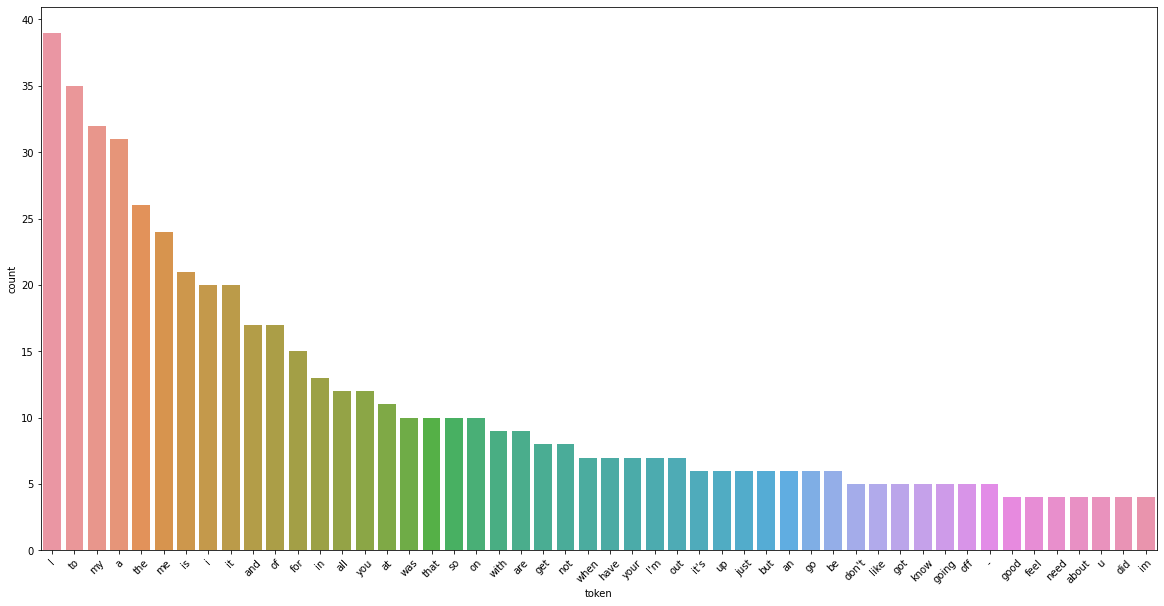

In [ ]:
most_repeated_word(keyword_anger, 'anger')

In [ ]:
from wordcloud import WordCloud #WordCloud

In [ ]:
def word_cloud(docx):
  wordcloud = WordCloud().generate(docx)
  plt.figure(figsize = (20,10))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

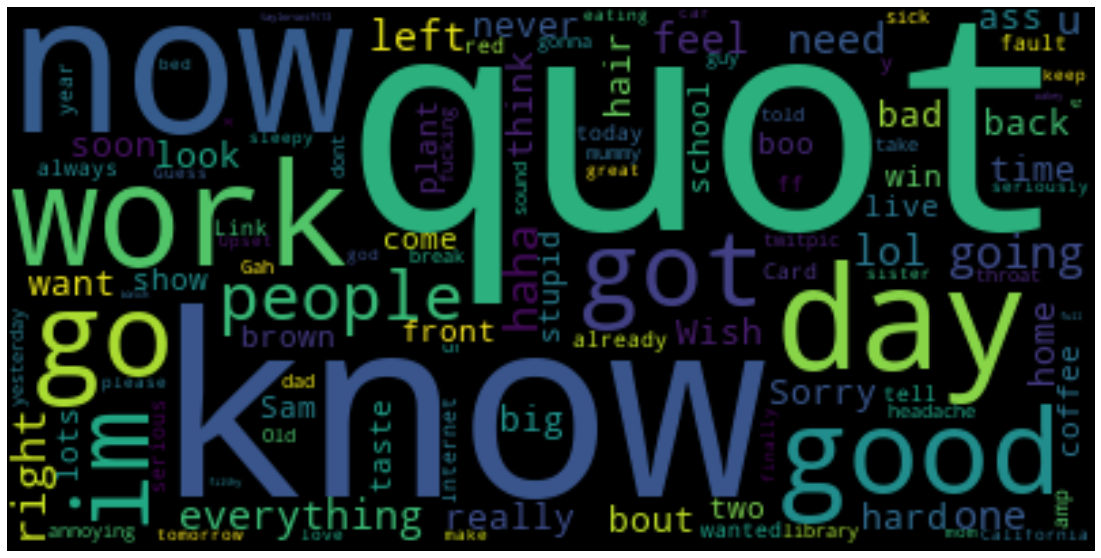

In [ ]:
word_cloud(anger_docx)

#Using NTLK (removing stopwords and tags)

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk 

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

sw_list = stopwords.words("english")

df['content'] = df['content'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [ ]:
df

,tweet_id,emotions,content,sentiments,clean_content
0,1956967341,empty,@tiffanylue know listenin bad habit earlier st...,Negative,know listenin bad habit earlier started frea...
1,1956967666,sadness,Layin n bed headache ughhhh...waitin call...,Neutral,Layin n bed headache ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral,Funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants hang friends SOON!,Positive,wants hang friends SOON
4,1956968416,neutral,@dannycastillo We want trade someone Houston t...,Neutral,want trade Houston tickets will
...,...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,Neutral,
39996,1753919001,love,Happy Mothers Day All love,Positive,Happy Mothers Day love
39997,1753919005,love,"Happy Mother's Day mommies there, woman man lo...",Positive,Happy Mothers Day mommies there woman man long...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP...,Positive,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...


In [ ]:
import re
def delete_tag(raw_content):
    clean_text = re.sub(re.compile('<.*?>@'),"",raw_content)
    return clean_text

In [ ]:
df["content"] = df["content"].apply(delete_tag)

In [ ]:
df.head(5)

,tweet_id,emotions,content,sentiments,clean_content
0,1956967341,empty,@tiffanylue know listenin bad habit earlier st...,Negative,know listenin bad habit earlier started frea...
1,1956967666,sadness,Layin n bed headache ughhhh...waitin call...,Neutral,Layin n bed headache ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral,Funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants hang friends SOON!,Positive,wants hang friends SOON
4,1956968416,neutral,@dannycastillo We want trade someone Houston t...,Neutral,want trade Houston tickets will


In [ ]:
df["content"] = df["content"].apply(lambda x: x.lower())

In [ ]:
df["content"][2]

'funeral ceremony...gloomy friday...'

#Accuracy and prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
xlabels = df['content']
ylabels = df['emotions']

In [ ]:
xlabels

0        @tiffanylue know listenin bad habit earlier st...
1             layin n bed headache ughhhh...waitin call...
2                      funeral ceremony...gloomy friday...
3                                 wants hang friends soon!
4        @dannycastillo we want trade someone houston t...
                               ...                        
39995                                     @johnlloydtaylor
39996                           happy mothers day all love
39997    happy mother's day mommies there, woman man lo...
39998    @niariley wassup beautiful!!! follow me!! peep...
39999    @mopedronin bullet train tokyo gf visiting jap...
Name: content, Length: 40000, dtype: object

In [ ]:
cv = CountVectorizer() #Vectorizer
x = cv.fit_transform(xlabels)

In [ ]:
cv.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '000th',
 '006',
 '00am',
 '00pm',
 '01',
 '01theone',
 '02',
 '023',
 '024',
 '0255',
 '02mxjj',
 '03',
 '04',
 '04182012154',
 '05',
 '053agj',
 '05ixbj',
 '06',
 '060',
 '0600',
 '06am',
 '07',
 '0783l',
 '07am',
 '07jzs',
 '07k6e',
 '07k6x',
 '07kbp',
 '07kbq',
 '07kbr',
 '07kjr',
 '07xfs',
 '07xoh',
 '07xoi',
 '07yez',
 '08',
 '08kaifj',
 '09',
 '0930',
 '097dfj',
 '09casper',
 '0_o',
 '0a7v3j',
 '0ayzyj',
 '0b5',
 '0egwanj',
 '0f',
 '0ghz',
 '0gmunj',
 '0guyoj',
 '0hhh',
 '0k',
 '0l2tsj',
 '0ltrdaj',
 '0mqko',
 '0n',
 '0omiriamo0',
 '0oze',
 '0rpm',
 '0s',
 '0t2b6j',
 '0ut',
 '0wvnpj',
 '0xcafebabe',
 '0xhu5j',
 '0xoxij',
 '0zr2jqj',
 '0zywwj',
 '10',
 '100',
 '1000',
 '10000',
 '10000000000',
 '100000000000000000000000000000000000',
 '1000th',
 '1000x',
 '100greatestgames',
 '100msg',
 '100rabh',
 '100th',
 '100x',
 '101',
 '1017',
 '102',
 '1027kiisfm',
 '103',
 '1030',
 '1034415',
 '103f',
 '104',
 '1045chumfm',
 '104m6wj',
 '105',
 '1052x1',
 '106',
 '106jackf

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, ylabels, test_size = 0.3, random_state =42)

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
nb_model.score(x_test, y_test)

0.31075

In [ ]:
y_pred_for_nb = nb_model.predict(x_test)

In [ ]:
y_pred_for_nb

array(['happiness', 'neutral', 'worry', ..., 'worry', 'neutral', 'worry'],
      dtype='<U10')

In [ ]:
sample_text = ['I hope to passs this course to 70%']

In [ ]:
vect = cv.transform(sample_text).toarray()

In [ ]:
nb_model.predict_proba(vect)

array([[2.11717874e-09, 2.56530627e-08, 7.09925585e-07, 2.52338548e-05,
        7.06787671e-04, 8.10582389e-02, 1.33637928e-04, 3.77703021e-02,
        6.85897335e-01, 4.64637100e-04, 3.60536686e-02, 1.02030577e-03,
        1.56869115e-01]])

In [ ]:
np.max(nb_model.predict_proba(vect))

0.6858973348614149

In [ ]:
def predict_emotion(text, model):
  myvect = cv.transform(sample_text).toarray()
  prediction = model.predict(myvect)
  pred_proba = model.predict_proba(myvect)
  pred_percentage_for_all = dict(zip(model.classes_, pred_proba))
  print('Prediction:{}, Prediction Score:{}'.format(prediction[0], np.max(pred_proba)))
  return pred_percentage_for_all

In [ ]:
predict_emotion(sample_text, nb_model)

Prediction:neutral, Prediction Score:0.6858973348614149


{'anger': array([2.11717874e-09, 2.56530627e-08, 7.09925585e-07, 2.52338548e-05,
        7.06787671e-04, 8.10582389e-02, 1.33637928e-04, 3.77703021e-02,
        6.85897335e-01, 4.64637100e-04, 3.60536686e-02, 1.02030577e-03,
        1.56869115e-01])}

In [ ]:
predict_emotion('I hope that my sister has not eaten my strawberries with choco', nb_model)

Prediction:neutral, Prediction Score:0.6858973348614149


{'anger': array([2.11717874e-09, 2.56530627e-08, 7.09925585e-07, 2.52338548e-05,
        7.06787671e-04, 8.10582389e-02, 1.33637928e-04, 3.77703021e-02,
        6.85897335e-01, 4.64637100e-04, 3.60536686e-02, 1.02030577e-03,
        1.56869115e-01])}

#Model classification

In [ ]:
print(classification_report(y_test, y_pred_for_nb))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        33
     boredom       0.00      0.00      0.00        57
       empty       0.00      0.00      0.00       242
  enthusiasm       0.00      0.00      0.00       249
         fun       0.00      0.00      0.00       513
   happiness       0.34      0.31      0.32      1568
        hate       0.43      0.01      0.02       383
        love       0.48      0.31      0.38      1134
     neutral       0.33      0.37      0.35      2620
      relief       0.00      0.00      0.00       515
     sadness       0.30      0.12      0.17      1560
    surprise       0.17      0.01      0.01       625
       worry       0.28      0.69      0.40      2501

    accuracy                           0.31     12000
   macro avg       0.18      0.14      0.13     12000
weighted avg       0.28      0.31      0.26     12000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test, y_pred_for_nb)

array([[   0,    0,    0,    0,    0,    2,    0,    1,   10,    0,    2,
           0,   18],
       [   0,    0,    0,    0,    0,    2,    0,    0,   11,    0,    5,
           0,   39],
       [   0,    0,    0,    0,    0,   16,    0,    7,   85,    0,   12,
           0,  122],
       [   0,    0,    0,    0,    1,   31,    0,    5,   72,    0,    9,
           0,  131],
       [   0,    0,    0,    0,    0,  104,    0,   21,  143,    0,   17,
           1,  227],
       [   0,    0,    0,    0,    2,  482,    0,  135,  389,    1,   30,
           2,  527],
       [   0,    0,    0,    0,    0,   10,    3,    1,   62,    0,   48,
           3,  256],
       [   0,    0,    0,    0,    0,  216,    0,  348,  206,    1,   30,
           0,  333],
       [   0,    0,    1,    0,    4,  244,    1,   81,  969,    3,  108,
           7, 1202],
       [   0,    0,    0,    0,    0,   82,    0,   24,  122,    0,   19,
           0,  268],
       [   0,    0,    1,    0,    1,   53,    1, 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2160x720 with 0 Axes>

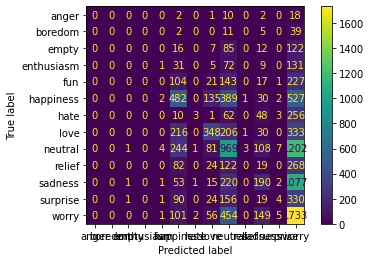

In [ ]:
plt.figure(figsize=(30,10))
plot_confusion_matrix(nb_model, x_test, y_test)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_model.score(x_test, y_test)

0.33366666666666667

In [ ]:
sample_text = ['I want strawberries with choco']

In [ ]:
predict_emotion(sample_text, lr_model)

Prediction:neutral, Prediction Score:0.7140995680385496


{'anger': array([0.00112339, 0.00245778, 0.01681038, 0.03756256, 0.0108539 ,
        0.07120122, 0.01262175, 0.06322655, 0.71409957, 0.00653212,
        0.0279995 , 0.006788  , 0.02872328])}

#LSTM summary

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

model = Sequential()
model.add(Embedding(2000, 128,input_length = x.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 48209, 128)        256000    
                                                                 
 spatial_dropout1d_8 (Spatia  (None, 48209, 128)       0         
 lDropout1D)                                                     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
Total params: 305,538
Trainable params: 305,538
Non-trainable params: 0
_________________________________________________________________
None
